1. matplotlib官方参考文档 https://matplotlib.org/tutorials/introductory/usage.html

2. Python matplotlib高级绘图详解 https://blog.csdn.net/matrix_laboratory/article/details/50698239

3. matplotlib绘图：figure和axes有什么区别？ https://blog.csdn.net/qq_31347869/article/details/104794515

# 0.引言
matplotlib是用Python语言实现的一个类似MATLAB的绘图工具，本文主要介绍matplotlib.pyplot的基本API层次、绘图结构及用法。1. 在matplotlib中最重要的基类Artist类及其派生类，主要分为容器类型（Figure，Axes，Axis等）和绘图元素类型（Line2D、 Rectangle、 Text、AxesImage 等）两类。2.  介绍matplotlib.pyplot的基本绘图结构，重点区分Figure，Axes，Axis三者的联系与区别，厘清plt.plot()和ax.plot()的异同。3. 介绍绘图Coding Sytle（面向对象风格object-oriented (OO) style和pyplot函数），掌握精调绘图细节，比如坐标轴范围、图例、标题等的绘图逻辑和方法。

# 1. API层次
matplotlib API包含有三层：

backend_bases.FigureCanvas : 图表的绘制领域
backend_bases.Renderer : 知道如何在FigureCanvas上如何绘图
artist.Artist : 知道如何使用Renderer在FigureCanvas上绘图

FigureCanvas和Renderer需要处理底层的绘图操作，例如使用wxPython在界面上绘图，或者使用PostScript绘制PDF。
Artist则处理所有的高层结构，例如处理图表、文字和曲线等的绘制和布局。通常我们只和Artist打交道，而不需要关心底层的绘制细节。

在matplotlib中最重要的基类**Artist类及其派生类**，主要分为容器类型和绘图元素类型两类，容器类型包括中Figure，Axes，Axis，这些类确定一个绘图区域，为元素类型提供显示位置；绘图元素类型包括Line2D、 Rectangle、 Text、AxesImage 等，这些是包含在容器类型提供的绘图区域中。

# 画板和画布的区别

![总的介绍](./images/figure_axis.png)

# 利用subplots 创建绘图对象：
fig, (ax1, ax2) = plt.subplots(1, 2) 

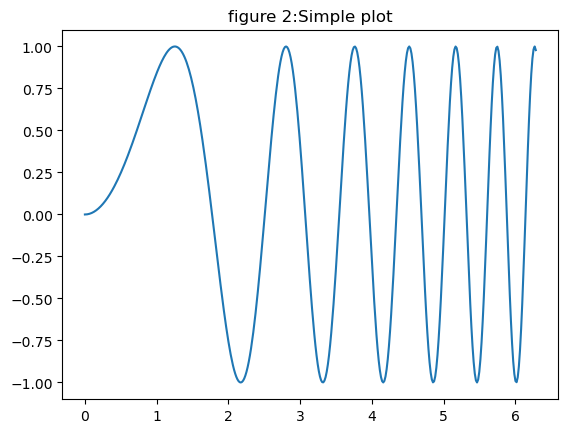

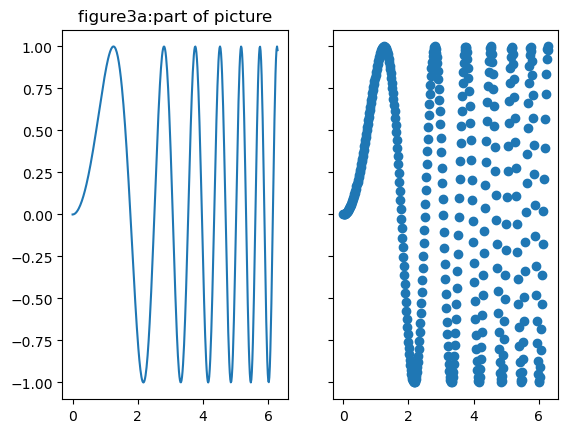

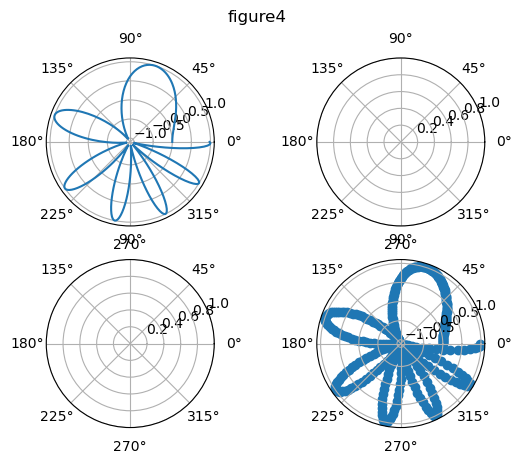

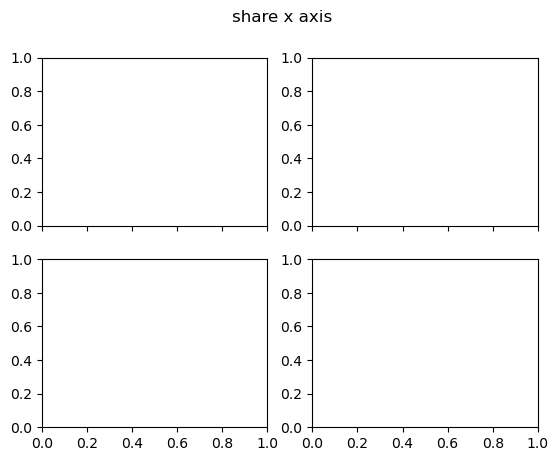

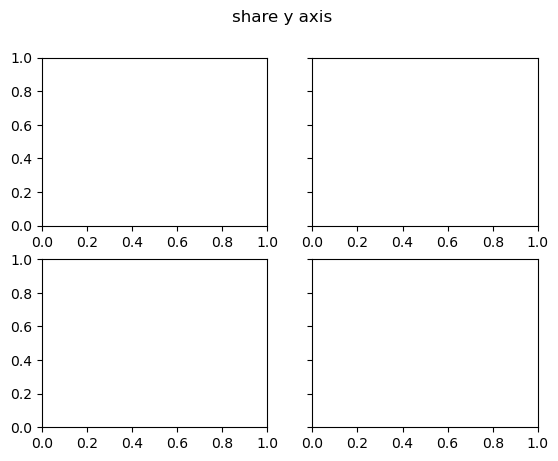

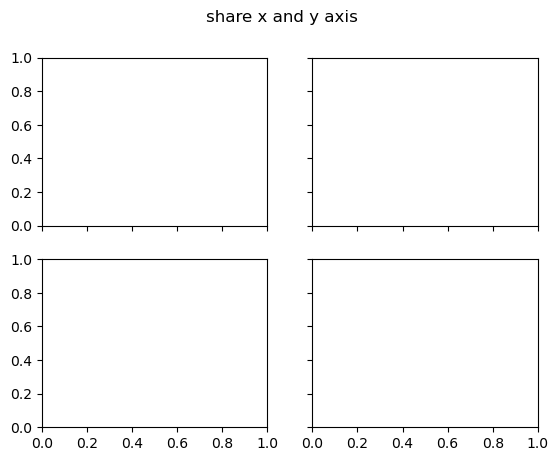

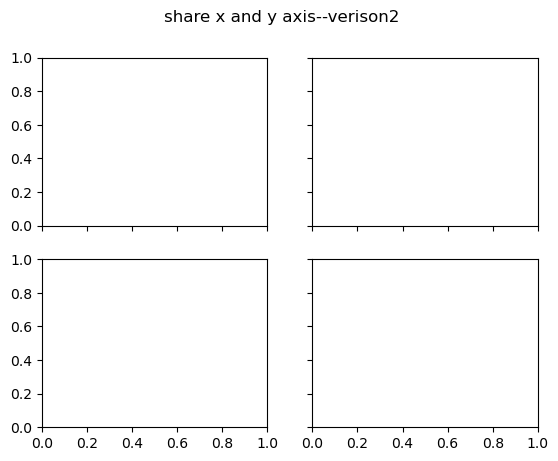

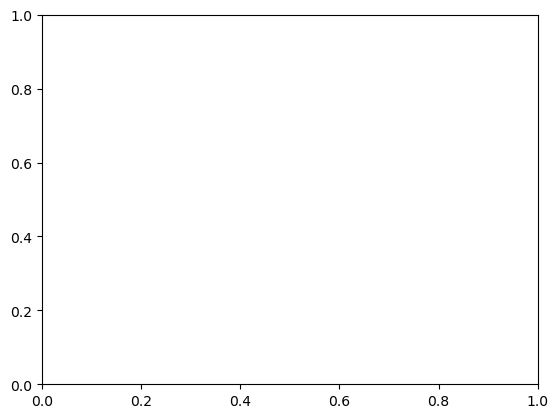

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# 创建一些测试数据 -- 图1
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)

# 创建一个画像和子图 -- 图2
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('figure 2:Simple plot')

# 创建两个子图 -- 图3
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x, y)
ax1.set_title('figure3a:part of picture')
ax2.scatter(x, y)

# 创建四个子图 -- 图4
fig, axs = plt.subplots(2, 2, subplot_kw=dict(projection="polar"))
plt.suptitle('figure4')
axs[0, 0].plot(x, y)
axs[1, 1].scatter(x, y)

# 共享 x 轴
plt.subplots(2, 2, sharex='col')
plt.suptitle('share x axis')
# 共享 y 轴
plt.subplots(2, 2, sharey='row')
plt.suptitle('share y axis')

# 共享 x 轴和 y 轴
plt.subplots(2, 2, sharex='all', sharey='all')
plt.suptitle('share x and y axis')
# 这个也是共享 x 轴和 y 轴
plt.subplots(2, 2, sharex=True, sharey=True)
plt.suptitle('share x and y axis--verison2')
# 创建标识为 10 的图，已经存在的则删除
fig, ax = plt.subplots(num=10, clear=True)

plt.show()

# 利用matplotlib.gridspec 进行子图的分布设置

In [18]:
def format_axes(fig):
    for i, ax in enumerate(fig.axes):
        ax.text(0.5, 0.5, "ax%d" % (i+1), va="center", ha="center")
        ax.tick_params(labelbottom=False, labelleft=False)

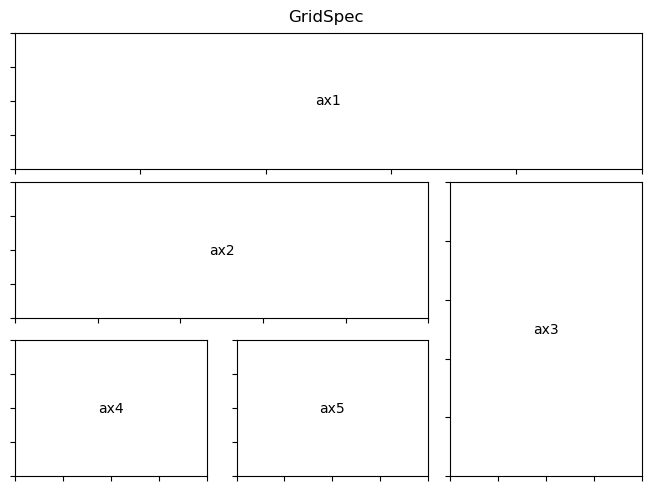

In [19]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
#取消网格线
plt.rcParams['axes.grid'] = False

# 取消背景方格
plt.rcParams['axes.axisbelow'] = True
fig = plt.figure(constrained_layout=True)
gs = gridspec.GridSpec(3, 3, figure=fig)
ax1 = fig.add_subplot(gs[0, :])
# identical to ax1 = plt.subplot(gs.new_subplotspec((0, 0), colspan=3))
ax2 = fig.add_subplot(gs[1, :-1])# 第2行和倒数第一列之前
ax3 = fig.add_subplot(gs[1:, -1])# 第2行和最后一列
ax4 = fig.add_subplot(gs[-1, 0])#最后一行，第一列
ax5 = fig.add_subplot(gs[-1, -2])#最后一行，倒数第二列

fig.suptitle("GridSpec")
format_axes(fig)

plt.show()

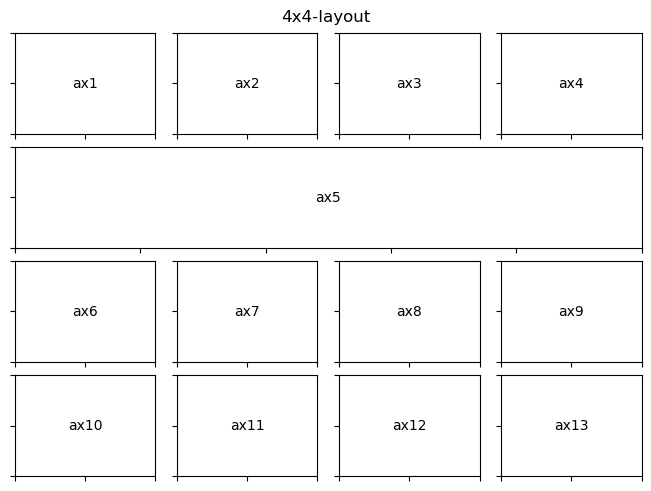

In [21]:
fig=plt.figure(constrained_layout=True)
gs=gridspec.GridSpec(4,4,figure=fig)
ax1=fig.add_subplot(gs[0,0])
ax2=fig.add_subplot(gs[0,1])
ax3=fig.add_subplot(gs[0,-2])
ax4=fig.add_subplot(gs[0,-1])
ax5=fig.add_subplot(gs[1,:])
ax6=fig.add_subplot(gs[2,0])
ax7=fig.add_subplot(gs[2,1])
ax8=fig.add_subplot(gs[2,-2])
ax9=fig.add_subplot(gs[2,-1])
ax10=fig.add_subplot(gs[3,0])
ax11=fig.add_subplot(gs[3,1])
ax12=fig.add_subplot(gs[3,-2])
ax13=fig.add_subplot(gs[3,-1])
fig.suptitle('4x4-layout')
format_axes(fig)

Text(0.5, 1.0, 'ax2')

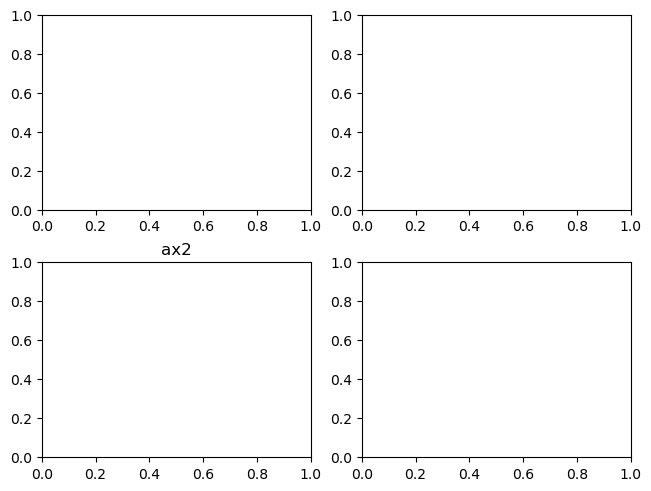

In [27]:
fig, ax_lst = plt.subplots(2, 2,constrained_layout=True)  # a figure with a 2x2 grid of Axes
ax_lst[1][0].set_title('ax2')

# 2. 图例的设置

## 1. local(原文链接： https://zhuanlan.zhihu.com/p/99531531），参数可以分为两种类型，str和元组

### 1) str类型

首先legend是一个bbox类型，是一个由4条边框围成的区域，轴域（axes)也是由4条边框围成的区域（x, y 轴，上边缘线，右边缘线），当loc为str类型时，表示 legend中str所代表的位置与轴域(axes)中str所代表的位置重合。

['upper left' , 'upper center', 'upper right',
'center left', 'center', 'center right',
'lower left', 'lower center', 'lower right']
使用方法是：
.legend(loc='center') #  通过设置loc = 'one of nine locations'即可

![](./images/str_local.webp)

### 2）. 元组类型

一对浮点数(x,y)，保存在元组中. 示例：loc = (0, 0)
（x, y）:此种形式是将legend的<mark>左下角</mark>放置在点（x, y）上，可参考下图

![tur_local](./images/tur_local.webp)

左图中红点坐标分别为(2,2), (7,8) , (11,7) , (14,5)

通过左右两张图比较，很容易看出，右图中legend的<mark>左下角</mark>与点(x, y)重合。

注意：当使用loc=(x,y)时，x, y并不是轴域中实际的x, y的值，而是将x轴, y轴分别看成1, 即：(x/(x_max-x_min), y/(y_max-y_min))（归1处理）;

在绘制上图时，其中xlim=(0, 16), ylim=(0, 9),所以如果将legend放置到点(2, 2)上，那loc实际要写成：

.legend(loc=(2/16, 2/9)) #图中显示的位置是x轴：2/16 *16，y轴：2/9 *9

/opt/homebrew/anaconda3/envs/puzzle_local/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 20803 (\N{CJK UNIFIED IDEOGRAPH-5143}) missing from current font.
  func(*args, **kwargs)
/opt/homebrew/anaconda3/envs/puzzle_local/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 32452 (\N{CJK UNIFIED IDEOGRAPH-7EC4}) missing from current font.
  func(*args, **kwargs)
/opt/homebrew/anaconda3/envs/puzzle_local/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 31867 (\N{CJK UNIFIED IDEOGRAPH-7C7B}) missing from current font.
  func(*args, **kwargs)
/opt/homebrew/anaconda3/envs/puzzle_local/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 22411 (\N{CJK UNIFIED IDEOGRAPH-578B}) missing from current font.
  func(*args, **kwargs)
/opt/homebrew/anaconda3/envs/puzzle_local/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 21442 (\N{CJK UNIFIED IDEOGRAPH-53C2}) missing from cur

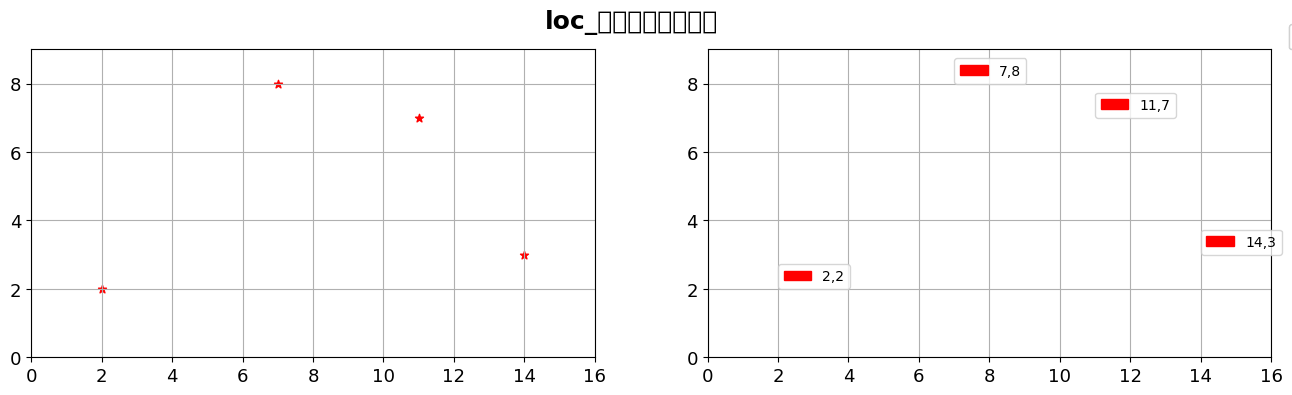

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

fig, axes= plt.subplots(1,2, figsize=(16, 4))

axes[0].set_xlim(0, 16)
axes[0].set_ylim(0, 9)
axes[1].set_xlim(0, 16)
axes[1].set_ylim(0, 9)

axes[0].grid()
axes[1].grid()
# 接下来利用（x, y）将legend分别放在图中(2,2) , (7,8), (11, 7), (14, 3)
axes[0].scatter(x=[2, 7, 11, 14, 16.5], y=[2, 8, 7, 3, 9], color='red', marker='*')  

# 
patch1 = mpatches.Patch(color='red', label='2,2')
patch2 = mpatches.Patch(color='red', label='7,8')
patch3 = mpatches.Patch(color='red', label='11,7')
patch4 = mpatches.Patch(color='red', label='14,3')
patch5 = mpatches.Patch(color='red', label='16.5, 9') 

patches = [patch1, patch2, patch3, patch4, patch5]
# 可以看到设置x,y值时，分别进行了归1的处理
location = [(2/16,2/9), (7/16,8/9), (11/16,7/9), (14/16,3/9), (16.5/16, 9/9)]
#
lst = []
for pathc, loc in zip(patches, location):
    lst.append(axes[1].legend(handles=[pathc], loc=loc))
#
for i in range(len(patches)):
    axes[1].add_artist(lst[i])
#
fig.suptitle('loc_元组类型参数图示', fontweight='bold', fontsize=18)
axes[1].tick_params(labelsize=13)
axes[0].tick_params(labelsize=13)

## 2. bbox_to_anchor 设置  
参考原文链接：https://blog.csdn.net/sinat_41299610/article/details/106494549  
            https://blog.csdn.net/chichoxian/article/details/101058046  
            https://zhuanlan.zhihu.com/p/101059179

### 1） 参数是两个元素

m对于两个元素的bbox_to_anchor()，也就是(x,y)，这个参数是代表了<mark>lengend_box</mark>的起点，并且是有后面的loc决定的，例如local参数是center，这个<mark>起点</mark>就变成<mark>中心点</mark>  
例如，设置(0.5,0.5), loc='center'，那么代表lengend_box的中心点（center）（起点）坐标是(0.5, 0.5)
设置(0.5,0.5), loc='lower center'，那么代表底边的中点坐标（起点）是(0.5,0.5)  
如图中标注的<mark>红点</mark>就是坐标(0.5，0.5)所在位置，然后根据loc参数的不同，对应到<mark>绿色</mark>的lengend_box位置也就不同。


![bbox_to_anchor的参数是两个](./images/tur_2.png)

### 2） 参数是四个元素

对于四个元素的bbox_to_anchor()，也就是(x, y, width, height)，情况就和上面两个元素的有所不同了。我们通过图来展示，会更清楚一点。  
如图，<mark>红色框</mark>为bounding_box，<mark>绿色框</mark>为legend_box，在加上了(height, width)两个参数后，实际的中心(起点)(x=0.5, y=0.5)来到了<mark>红色框</mark>中，也就是图中<mark>黑色点标记处</mark>，然后再根据(height, width)分别扩展。（所以为什么可以理解（x,y）可以理解为起点。  

<mark>其实，四个元素，表示bbox_to_anchor已经确定好一个矩形面积，起点是(x,y）,width, height分别是扩展的宽度和高度，这时候，local无论是字符还是元组，都表示在这个矩形区域中的相对位置.</mark>




![bbox_to_anchor参数是四个](./images/tur_4.png)

In [ ]:
那个(height, width)对于绿色框又产生了什么影响呢？我们从图中的紫色点标记处来看，绿色框的起点应该是和loc参数对应。  
当loc='center'时，绿色框的起点应该是在红色框的正中心，然后根据(height,width)向四周边扩散(因为是center)；
当loc='lower center'时，绿色框的起点在红色框的底边中心，然后根据(height,width)向两边以及上面扩散（因为是lower+center）；

![example_1](./images/tur_4_1.png)

#### bbox_to_anchor确定矩形区域后，local =upper left(图例起点分布上边的左边）

Text(2, 4.3, '红框即为bbox_to_anchor所代表的区域')

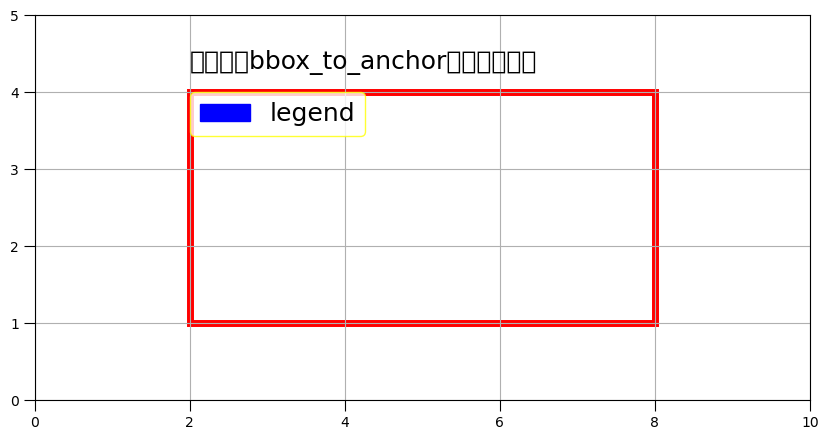

In [19]:
from matplotlib.patches import Rectangle
import matplotlib.patches as mpatches

fig, ax = plt.subplots(figsize=(10, 5))
ax.set_ylim(0, 5)
ax.set_xlim(0, 10)
ax.grid()

rect = Rectangle((2, 1), 6, 3, fill=False, ec='red',lw=5)
ax.add_artist(rect)
ax.tick_params(size=8)
patch = mpatches.Patch(color='blue', label='legend')

ax.legend(handles=[patch], loc='upper left', bbox_to_anchor=(1/5, 1/5, 6/10, 3/5), borderaxespad=0, fontsize=18, edgecolor='yellow')
# ax.annotate('(14, 6)', xy=(14, 6), xytext=(15, 6.5),arrowprops={'arrowstyle':'->'}, fontsize=18)
ax.text(2, 4.3, '红框即为bbox_to_anchor所代表的区域', fontsize=18)

#### bbox_to_anchor确定矩形区域后，local =（1/3，1/3）(图例起点分布在红色框的1/3的区域）

Text(2, 4.3, '红框即为bbox_to_anchor所代表的区域')

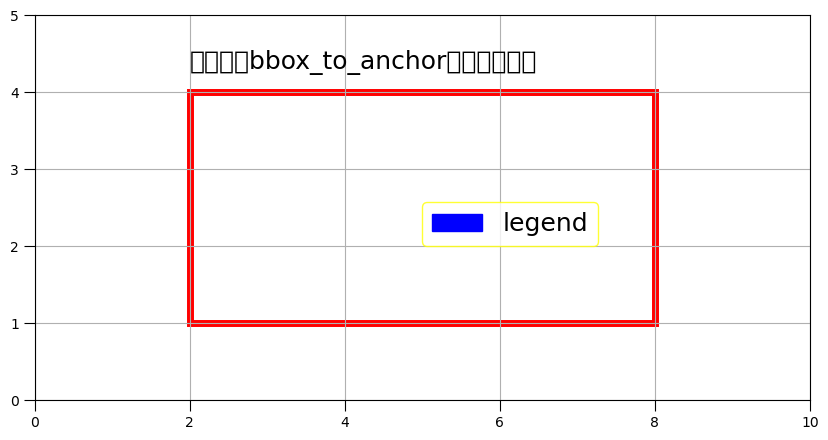

In [30]:
from matplotlib.patches import Rectangle
import matplotlib.patches as mpatches

fig, ax = plt.subplots(figsize=(10, 5))
ax.set_ylim(0, 5)
ax.set_xlim(0, 10)
ax.grid()

rect = Rectangle((2, 1), 6, 3, fill=False, ec='red',lw=5)
ax.add_artist(rect)
ax.tick_params(size=8)
patch = mpatches.Patch(color='blue', label='legend')

ax.legend(handles=[patch], loc=(1/2,1/3), bbox_to_anchor=(1/5, 1/5, 6/10, 3/5), borderaxespad=0, fontsize=18, edgecolor='yellow')
# ax.annotate('(14, 6)', xy=(14, 6), xytext=(15, 6.5),arrowprops={'arrowstyle':'->'}, fontsize=18)
ax.text(2, 4.3, '红框即为bbox_to_anchor所代表的区域', fontsize=18)

In [ ]:
#### bbox_to_anchor的宽度和高度设置：  
1. bbox_to_anchor 参数中的宽度和高度参数，实际上是用于指定图例（legend）的大小的。但是如果指定的宽度和高度超出了图例中实际需要的大小，那么图例的大小仍然会根据实际需要进行调整，而不是按照指定的宽度和高度进行固定。
因此，当你将 bbox_to_anchor 参数中的宽度和高度参数改变时，如果图例中实际需要的大小没有超出指定的宽度和高度，那么图例的大小就不会发生变化，只会改变位置。如果你想要改变图例的大小，可以尝试调整图例中实际需要的元素的大小或者间距等参数。
2. 

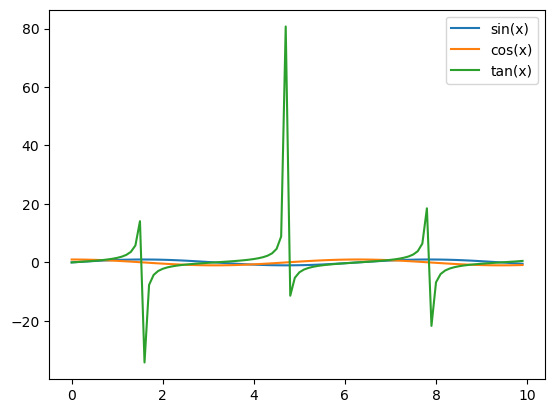

In [61]:
import matplotlib.pyplot as plt
import numpy as np

# 生成数据
x = np.arange(0, 10, 0.1)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.tan(x)

# 绘制折线图
fig, ax = plt.subplots()
ax.plot(x, y1, label='sin(x)')
ax.plot(x, y2, label='cos(x)')
ax.plot(x, y3, label='tan(x)')

# 设置图例位置和大小
bbox_to_anchor = (0.5, 0.5, 0.5, 0.5)
ax.legend(bbox_to_anchor=bbox_to_anchor, loc='upper right')

plt.show()
#这里将 bbox_to_anchor 参数设置为 (0.5, 0.5, 0.5, 0.5)，表示图例位于整个图形区域的中心，宽度为整个图形区域宽度的一半，高度为整个图形区域高度的一半。
#因为实际上图例中的元素不需要那么大，所以最终图例的大小会根据实际需要进行调整。如果你想要改变图例中元素的大小或者间距等参数，可以通过 legend 方法的其他参数进行设置。

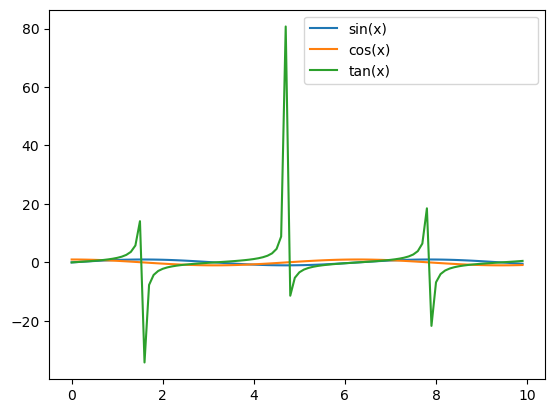

In [63]:
#宽度和高度参数在 bbox_to_anchor 参数中仍然有作用，只不过在某些情况下可能会被实际需要的大小所覆盖，导致最终图例的大小不同于指定的宽度和高度。
#如果你想要确保图例的大小与指定的宽度和高度一致，可以通过设置 mode 参数为 expand 来实现。例如：
#这里将 mode 参数设置为 expand，表示图例的大小将根据指定的宽度和高度进行固定。注意，在这种情况下，如果实际需要的大小超出了指定的宽度和高度，那么图例就会被裁剪。
import matplotlib.pyplot as plt
import numpy as np

# 生成数据
x = np.arange(0, 10, 0.1)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.tan(x)

# 绘制折线图
fig, ax = plt.subplots()
ax.plot(x, y1, label='sin(x)')
ax.plot(x, y2, label='cos(x)')
ax.plot(x, y3, label='tan(x)')

# 设置图例位置和大小
bbox_to_anchor = (0.5, 0.5, 0.5, 0.5)
ax.legend(bbox_to_anchor=bbox_to_anchor, loc='upper right', mode='expand')

plt.show()


# summary:
1. local 确定图例起点（左下角）的位置，存在两种表示方法str（也可以是数字）和元组（数字/x_max-x_min,数字/y_max-y_min)，后者更加准确进行确定
2. bbox_to_anchor 确定图例所在的背景区域，存在点，面，线（特殊的面）表示方法，即bbox_to_anchor画了一块地（矩形或者点），再通过loc参数的设置，使legend围绕着这块地儿闪转腾挪，其实当你没设置这个参数的时候，这个参数的默认值帮你画好了地，不是axes.bbox就是figure.bbox。<mark>现在你可以通过(x, y, width, height)自己画地儿了</mark>。  

    2.1 当bbox_to_anchor是一个点时:(x, y) ，local是str或int时，表示(x,y)这个点是什么起点（例如center或upper left）；local是元组的时候，loc不再起作用，仅仅是让legend的左下角与bbox_to_anchor指定的点重合（即local就是lower left）
    2.2 当bbox_to_anchor是一个矩形时:(x, y, width, height)  ：矩形确定了，local确定在矩形中的分布区域，local='upper left'表示分布在左上角，，如果要精确的话，local可以利用元组进行表示，例如（1/2,1/3),则起点是（矩形的宽*1/2 ，矩形的高*1/3）
    2.3 当bbox_to_anchor是一条线时:(x, y, width, height=0)确定底线在哪里了。  
3. 常用搭配：local是str,是bbox_to_anchor，其中（0，0）和（1，1）分别表示axis的左下角和右上角(紧贴x轴或y轴），所以（1.2，1.05）表示右上角，但是距离坐标轴有一段距离。（常用图的参考原文：https://www.jb51.net/article/186659.htm）


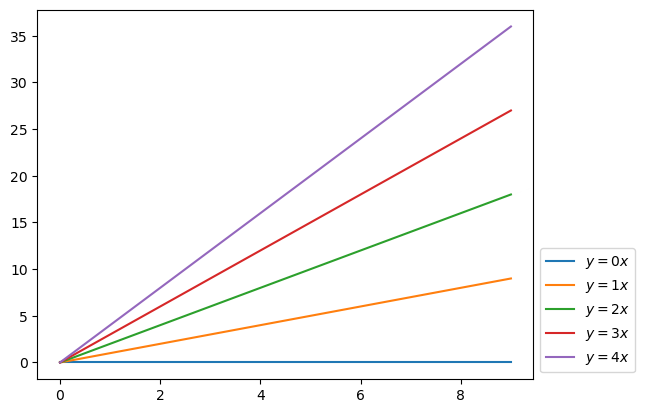

In [58]:
import matplotlib.pyplot as plt
import numpy as np
  
x = np.arange(10)
  
fig = plt.figure()
ax = plt.subplot(111)
  
for i in range(5):
 ax.plot(x, i * x, label='$y = %ix$' % i)
  
plt.legend(loc='lower left',bbox_to_anchor=(1,0))
  
plt.show()

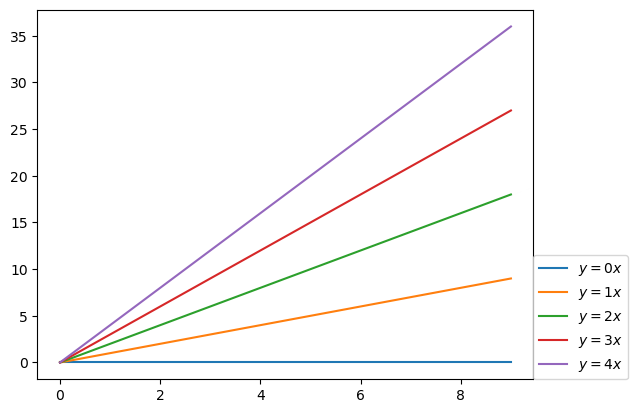

In [59]:
import matplotlib.pyplot as plt
import numpy as np
  
x = np.arange(10)
  
fig = plt.figure()
ax = plt.subplot(111)
  
for i in range(5):
 ax.plot(x, i * x, label='$y = %ix$' % i)
  
plt.legend(loc='lower left',bbox_to_anchor=(1,0),borderaxespad=0)#borderaxespad=0取消 axis 和legend之间的填充
  
plt.show()

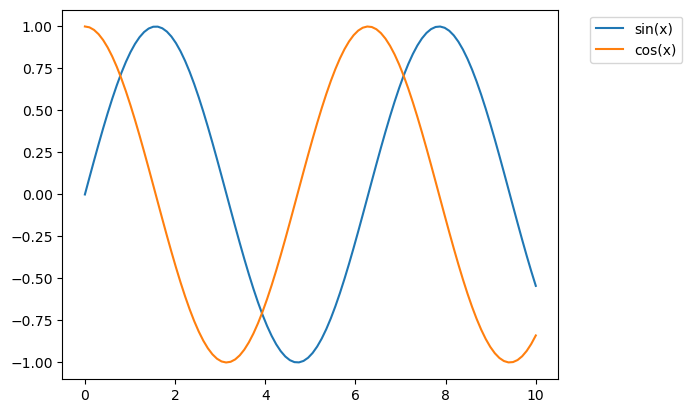

In [78]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 100)

plt.plot(x, np.sin(x), label="sin(x)")
plt.plot(x, np.cos(x), label="cos(x)")

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.savefig(r'./cut.png',bbox_inches='tight')
plt.show()


# summary ：  
1. 保存图片时候，发现图例被剪裁，可以存在两种解决方法  
    1.1 plt.tight_layout() 使子图合适的跟图形匹配，但是图片被拉伸，可能存在不变形（https://www.jiyik.com/tm/xwzj/prolan_3798.html ）
    1.2 plt.savefig(....,bbox_inches='tight'),添加bbox_inches='tight' 参数（最佳方法）（https://cloud.tencent.com/developer/article/2196942?from=article.detail.1741942&areaSource=106000.2&traceId=juv1s_trmHwqeu10Ce2DS ）
2. 调整图例中label和字体之间的间距（https://www.cnblogs.com/JoshuaYu/p/16548074.html ）


# 3. matplotlib中整体参数设置  
https://www.zhihu.com/market/pub/120331082/manuscript/1542977815682920448  
https://mp.weixin.qq.com/s/huWVEa-93qJVqZFyCbVfiQ

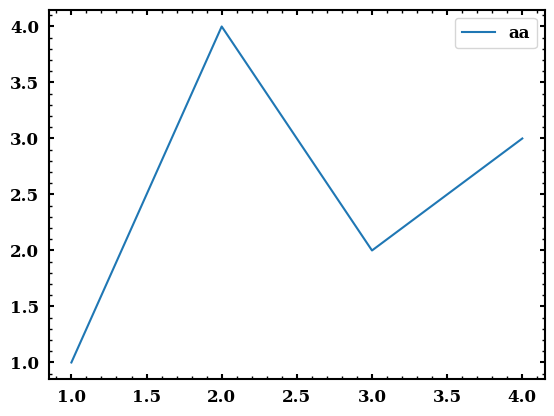

In [81]:
import matplotlib.pyplot as plt

# 创建包含参数名称和对应值的字典
params = {
    'font.family': 'serif',  # 设置字体为 serif
    'font.weight': 'heavy',  # 设置字体加粗
    'axes.labelweight': 'heavy',  # 设置坐标轴标签加粗
    'axes.titleweight': 'heavy',  # 设置图表标题加粗
    'font.size': 12,  # 设置字体大小为12
    'xtick.direction': 'in',  # 设置x轴主刻度线方向向内
    'ytick.direction': 'in',  # 设置y轴主刻度线方向向内
    'xtick.major.width': 1.5,  # 设置x轴主刻度线宽度为1.5
    'ytick.major.width': 1.5,  # 设置y轴主刻度线宽度为1.5
    'axes.linewidth': 1.5,  # 设置坐标轴线宽度为1.5
    'xtick.top': True,  # 设置x轴顶部有刻度线
    'ytick.right': True,  # 设置y轴右侧有刻度线
    'xtick.minor.visible': True,  # 设置x轴有次刻度线
    'ytick.minor.visible': True,  # 设置y轴有次刻度线
    'xtick.minor.width': 1.0,  # 设置x轴次刻度线宽度为1.0
    'ytick.minor.width': 1.0,  # 设置y轴次刻度线宽度为1.0
    'xtick.major.pad': 7,  # 设置x轴主刻度线标签与刻度线的距离为7
    'ytick.major.pad': 7,  # 设置y轴主刻度线标签与刻度线的距离为7
    'axes.labelpad': 10,  # 设置坐标轴标签与坐标轴的距离为10
    'axes.titlepad': 10,  # 设置标题与坐标轴的距离为10
}

# 使用 params 字典更新 rcParams 字典
plt.rcParams.update(params)



fig, ax = plt.subplots()

x = [1, 2, 3, 4]
y = [1, 4, 2, 3]

ax.plot(x, y, label='aa')

ax.set_xlabel('')
ax.set_ylabel('')
ax.legend()

# 指定分辨率为 300 DPI，并且将图形周围的空白部分裁剪掉
# 科研绘图常用推荐 300 DPI
#fig.savefig('test.png', dpi=300, bbox_inches='tight')

# function 形成绘图，exc()字符串拼接的命令

ax1: AxesSubplot(0.125,0.653529;0.352273x0.226471)
ax2: AxesSubplot(0.547727,0.653529;0.352273x0.226471)
ax3: AxesSubplot(0.125,0.381765;0.352273x0.226471)
ax4: AxesSubplot(0.547727,0.381765;0.352273x0.226471)
ax5: AxesSubplot(0.125,0.11;0.352273x0.226471)
ax6: AxesSubplot(0.547727,0.11;0.352273x0.226471)


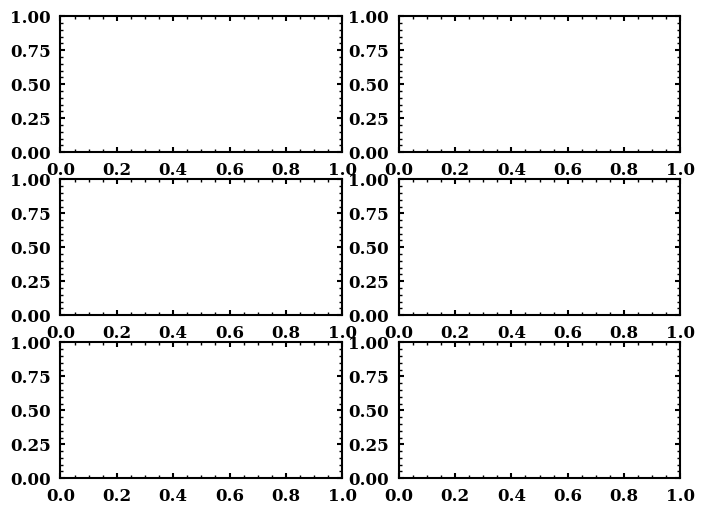

In [82]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# 定义图形大小和布局
fig = plt.figure(figsize=(8, 6))
gs = gridspec.GridSpec(3, 2)

# 动态创建子图并赋值给变量
for i in range(3):
    for j in range(2):
        num = i * 2 + j + 1
        exec(f"ax{num} = fig.add_subplot(gs[i, j])")

# 打印变量名和对应的子图对象
for i in range(1, 7):
    exec(f"print('ax{i}:', ax{i})")


# color selection

In [88]:
import numpy as np
import pandas as pd
x1=np.random.randint(1,31,size=30)
x2=np.random.randint(3,33,size=30)

y1=np.random.randint(1,31,size=30)
y2=np.random.randint(3,33,size=30)
z=[f"p{i}" for i in range(1,31)]
df_test = pd.DataFrame({"d1": x1,"d2":x2,"d3":y1,"d4":y2 ,"group":z})
df_test

,d1,d2,d3,d4,group
0,25,13,7,3,p1
1,14,3,5,4,p2
2,9,19,30,20,p3
3,24,26,16,26,p4
4,3,20,12,16,p5
5,16,9,1,9,p6
6,27,8,25,27,p7
7,28,3,16,28,p8
8,23,13,12,14,p9
9,27,9,17,8,p10


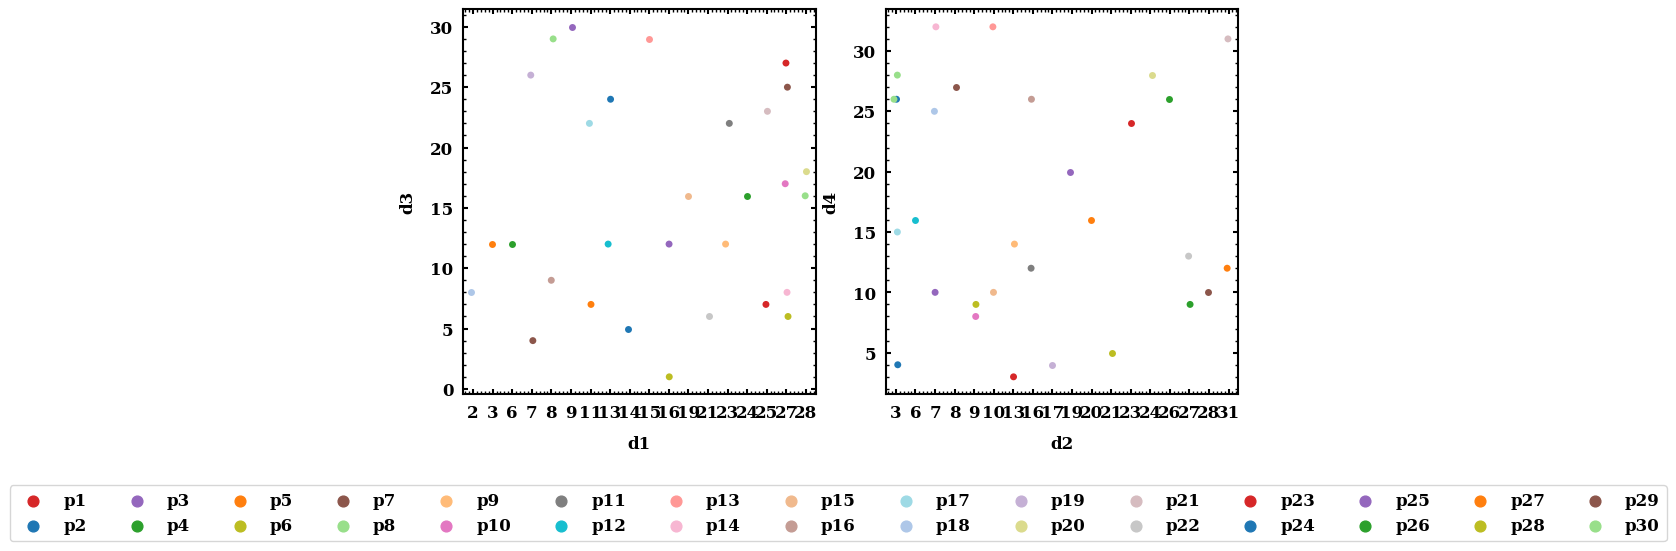

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt
# 绘制两个子图
fig, (ax1,ax2)= plt.subplots(ncols=2, figsize=(10, 5))
# 子图1
sns.stripplot(x='d1', y='d3', data=df_test,hue="group",palette=color_22, ax=ax1)
handles1, labels1 = ax1.get_legend_handles_labels()
ax1.legend_.remove()
sns.stripplot(x='d2', y='d4', data=df_test,hue="group",palette=color_22, ax=ax2)
handles2, labels2 = ax2.get_legend_handles_labels()
ax2.legend_.remove()
# 判断legend是否一致
if labels1 == labels2:
    fig.legend(handles1, labels1, loc='lower center',ncol=len(labels1)//2, bbox_to_anchor=(0.5, -0.2))
plt.show()

In [93]:
color_22=['#d62728',
          '#1f77b4',
          '#9467bd',
          '#2ca02c',
          '#ff7f0e',
          '#bcbd22',
          '#8c564b', 
          '#98df8a', 
          '#ffbb78',
          '#e377c2',
          '#7f7f7f', 
          '#17becf', 
          '#ff9896', 
          '#f7b6d2',
          '#f0b98d',
          '#c49c94',
          '#9edae5',
          '#aec7e8', 
          '#c5b0d5', 
          '#dbdb8d',
          '#d6bcc0',
          '#c7c7c7'         
]

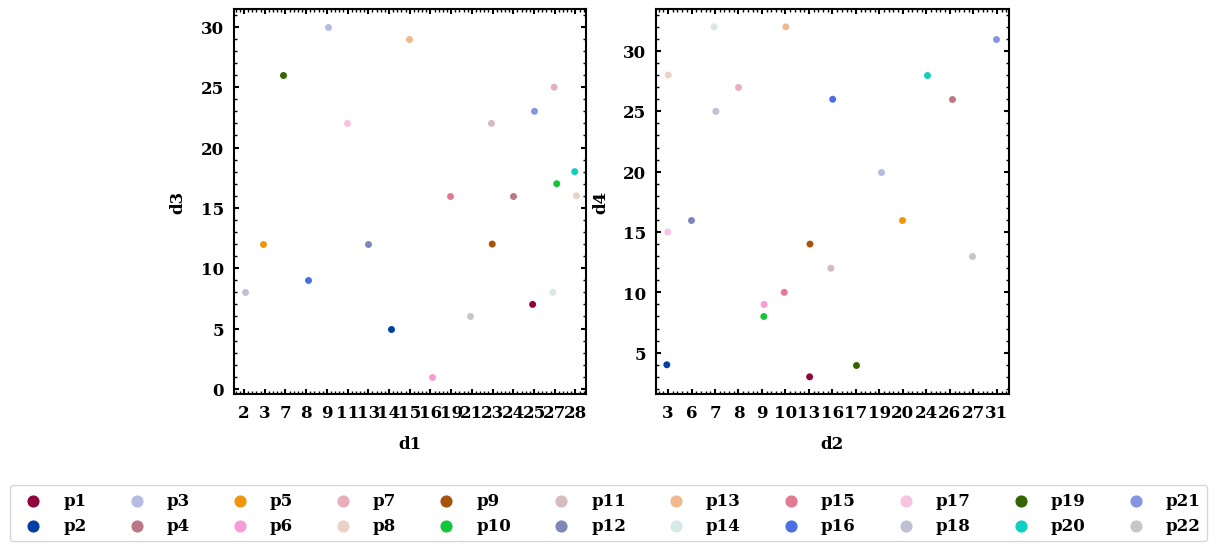

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt
# 绘制两个子图
fig, (ax1,ax2)= plt.subplots(ncols=2, figsize=(10, 5))
# 子图1
sns.stripplot(x='d1', y='d3', data=df_test[:22],hue="group",palette=color_30, ax=ax1)
handles1, labels1 = ax1.get_legend_handles_labels()
ax1.legend_.remove()
sns.stripplot(x='d2', y='d4', data=df_test[:22],hue="group",palette=color_30, ax=ax2)
handles2, labels2 = ax2.get_legend_handles_labels()
ax2.legend_.remove()
# 判断legend是否一致
if labels1 == labels2:
    fig.legend(handles1, labels1, loc='lower center',ncol=len(labels1)//2, bbox_to_anchor=(0.5, -0.2))
plt.show()

In [98]:
color_30=['#8e063b',
 '#023fa5',
 '#b5bbe3',
 '#bb7784',
 '#ef9708',
 '#f79cd4',
 '#e6afb9',
 '#ead3c6',
 '#a5540e',
 '#11c638',
 '#d6bcc0',
 '#7d87b9',
 '#f0b98d',
 '#d5eae7',
 '#e07b91',
 '#4a6fe3',
 '#f6c4e1',
 '#bec1d4',
 '#336600',
 '#0fcfc0',
 '#8595e1',
 '#c7c7c7',
 '#d33f6a',
 '#7f7f7f',
 '#f3e1eb',
 '#8dd593',
 '#9cded6',
 '#babb1e',
 '#c6dec7',
 '#1CE6FF']